In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams as rc

In [2]:
rc['legend.fontsize']=18
rc['axes.titlesize']=18
rc['lines.linewidth']=1.5
rc['lines.markersize']=8
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True

33.26194899209965
37.93390317124966
69.18384622793802
100.28222632302165
528.8249934598675
3135.125635947496
4106.621690508546


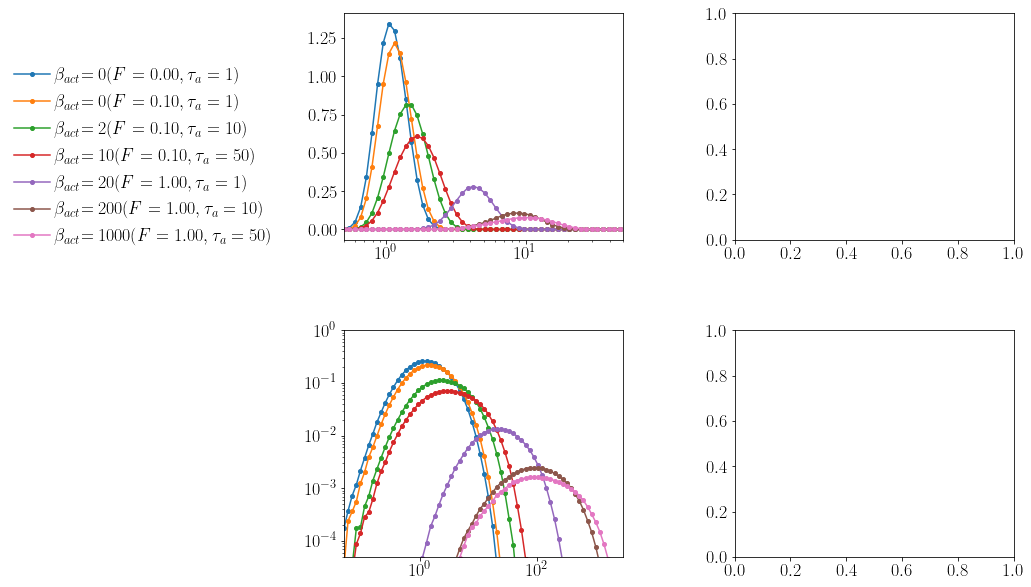

In [67]:
fig,axes=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'wspace':0.4, 'hspace':0.4})

[[ax1,ax2],[ax3,ax4]]=axes
# [ax1,ax2]=axes
ind=4
fpath='../../data/ROUSE_chain_confined_Ns/'
for fname in os.listdir(fpath):
    if '.npy' in fname and 'gyr' in fname:
        # print(fname)#.split('_'))
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        kb=float(fname.split('_')[ind+7].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))
        dt=float(fname.split('_')[ind+8].replace('dt',''))
            
        b_act=np.around(F**2*Ta/(0.1*T), decimals=0)
        # if b_act not in [0.0, 2.0,40.0, 160.0, 180.0]: continue
        # if F==0.01 or F==0.8: continue
        if R0==100 and T==0.5 and kb==5:
            data=np.load(fpath+fname)
            data=data.reshape(data.shape[0]*data.shape[1],data.shape[2])
            Rg=np.sqrt(np.mean(data, axis=1))
            hist,bin_edges=np.histogram(Rg, bins=np.logspace(-2,2,100), density=True)
            ax1.semilogx(bin_edges[:-1],hist,'.-', label='$\\beta_{act}$'+'$={:.0f} (F={:.2f}, \\tau_a={:.0f})$'.format(b_act, F,Ta))

            # k2=1.5*np.linalg.norm(data, axis=1)**2/np.sum(data, axis=1)**2-0.5
            # # print(k2.min(),k2.max())
            # hist,bin_edges=np.histogram(k2, bins=np.linspace(0,1.1,50), density=True)
            # ax2.plot(bin_edges[:-1],hist,'.-', label='$\\beta_{act}$'+'={:.0f}'.format(b_act))

            bsp=data[:,2]-0.5*(data[:,1]+data[:,0])
            hist,bin_edges=np.histogram(bsp, bins=np.logspace(-3,4,100), density=True)
            ax3.loglog(bin_edges[:-1],hist,'.-', label='$\\beta_{act}$'+'={:.0f}'.format(b_act))

            print(bsp.max())
ax1.legend(loc='lower right',bbox_to_anchor=(-0.2,-0.1))
ax1.set_xlim(0.5,50)
ax2.set_xlim(0,1)
ax3.set_xlim(0.05,3e3)
ax3.set_ylim(5e-5,1)
# ax2.legend()
plt.savefig('../../plots/Rouse/RG_asph_R0100_.png', bbox_inches='tight', dpi=300)

In [30]:
np.around(0.101, decimals=0)

0.0